# <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Regularization (LASSO, Ridge and Elastic Net) on the Advertising Dataset</p>


<div class="alert alert-block alert-info alert">  
    
## <span style ="color:#f2074e;">List of Contents
* Introduction
* Feature Scaling
* Cross-Validation
* Polynomial Conversion
* Train | Test Split
* Scaling the Data
* Regularization
  
**1. LASSO Regression (L1 Regularization)**

Choosing an alpha value with Cross-Validation (LassoCV)

**2. Ridge Regression (L2 Regularization)**

Choosing an alpha value with Cross-Validation (RidgeCV)

**3. Elastic Net**

## Introduction

In the previous works, I implemented Simple Linear Regression and Polynomial Regression on the **Advertising dataset** and compared the error metrics for both models to achieve better prediciton of the sales. In this notebook, I will use **regularization techniques** on the same dataset. Therefore, I will have the chance to see the effects of the regularization on the coefficients and error metrics.

Regularization attempts to minimize the RSS (residual sum of squares) *and* a penalty factor. This penalty factor will penalize models that have coefficients that are too large. Some methods of regularization will cause non-useful features to have a coefficient of zero, in which case the model does not considesome e featusre.

## Feature Scaling
* **Some Machine Learning models** that rely on distance metrics (e.g. KNN) **require scaling** to perform well.
* Feature scaling improves the convergence of steepest descent algorithms, which do not possess the property of scale invariance.
* If features are on different scales, certain weights may update faster than others since the feature values play a role in weight updates.
* **Critical benefit of feature scaling related to gradient descent.**
* Tehre are some ML algorithms wherre scaling will not have an effect (e.g. CART based methods).
* Scaling the features so that their respective ranges are **uniform is important in comparing measurements** that have different units.
* It allows us directly compare model coefficients to each other.
* **Must always scale new unseen data before feeding to model.**
* Effects direct interpretability of feature coefficients.
* **Feature scaling benefits:**
  
> Can lead to great increases in performance.

> Absolutely necessary for some models.

> Virtually no "real" downside to scaling features.

#### Two main ways to scale features:
  
**1. Standardization:** Rescales data to have **a mean of 0 and standard deviation of 1**. It is also called **Z-score normalization**.

**2. Normalization:** Rescales all data values to be **between 0-1**.

* There are many more methods of scaling features and **Scikit-Learn** provides easy to use classes that **fit** and **transform** feature data for scaling.
* A **.fit()** call simply calculates the necessary statistics (Xmin, Xmax, mean, standard deviation). 
* A **.transform()** call actually scales data and returns the new scaled version of data.
* We **only fit to training data**. Calculating statistical information should only come from training data.,
* Using the full data set would cause **data leakage**.
#### Feature scaling process:
  
> Perform train-test split

> Fit to training feature data

> Transform training feature data

> Transform test feature data

#### Do we need to scale the label (y)?
* In general, it is not necessary nor advised.
* Normalizing the output distribution is altering the definition of the target.
* Can negatively impact stochastic gradient descent.
* So, we only scale the features (X).


## Cross-Validation
* Cross-validation is a more advanced set of methods for splitting data into training and testing sets.
* Is there a way we can train on all the data and evaluate on all the data. While it sounds impossible, **we can achieve this with cross validation**.

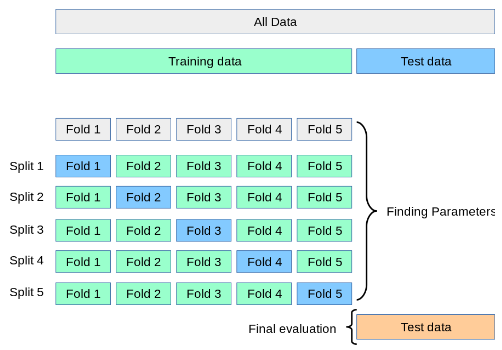

* We get a better sense of true performance across multiple potential splits.
* What is the sost of this? We have to repeat computations K number of times (K-fold cross-validation). 

### Import Librarires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
# To receive features (X), drop label (y)
X = df.drop("sales", axis=1)

In [4]:
y = df["sales"]

### Polynomial Conversion

We use here the Polynomial Regression model that we analyzed and evaluated in a diffirent notebook. See: https://github.com/msevim24/MachineLearning_DeepLearning_Projects/blob/master/Polynomial%20Regression_Advertising%20Data_Udemy.ipynb

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False) # degree 3

In [7]:
# fit and transform the entire data set
poly_features = polynomial_converter.fit_transform(X)

In [8]:
# shape of the original data
X.shape

(200, 3)

In [9]:
# shape of the new data with interaction and squared terms
poly_features.shape

(200, 19)

### Train | Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# instead of X, we will use our new data here: poly_features
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

### Scaling the Data

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
# Only fit the train set (X_train) to prevent data leakage

scaler.fit(X_train)

StandardScaler()

In [15]:
# Then we can transform X_train and X_test

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Compare the original values with the scaled values

# As seen, the scaled values are very small
X_train[0]

array([ 0.49300171, -0.33994238,  1.61586707,  0.28407363, -0.02568776,
        1.49677566, -0.59023161,  0.41659155,  1.6137853 ,  0.08057172,
       -0.05392229,  1.01524393, -0.36986163,  0.52457967,  1.48737034,
       -0.66096022, -0.16360242,  0.54694754,  1.37075536])

In [17]:
# Those are the values before scaled
poly_features[0]

array([2.30100000e+02, 3.78000000e+01, 6.92000000e+01, 5.29460100e+04,
       8.69778000e+03, 1.59229200e+04, 1.42884000e+03, 2.61576000e+03,
       4.78864000e+03, 1.21828769e+07, 2.00135918e+06, 3.66386389e+06,
       3.28776084e+05, 6.01886376e+05, 1.10186606e+06, 5.40101520e+04,
       9.88757280e+04, 1.81010592e+05, 3.31373888e+05])

# Regularization
Regularization seeks **to solve a few common model issues** by:
- Minimizing model complexity
- Penalizing the loss function
- Reducing model overfitting (add more bias to reduce model variance)
  
In general, we can think of regularization as a way to reduce model overfitting and variance.

**Three main types of Regularization:**

**1.** L1 Regularization: **LASSO Regression**

**2.** L2 Regularization: **Ridge Regression**

**3.** Combining L1 and L2: **Elastic Net**

These regularization methods have a **cost**:
* Introduce a additional hyperparameter that needs to be tuned.
* A multiplier to the penalty to decide the "strength" of the penalty.

## 1. LASSO Regression (L1 Regularization)
* LASSO: Least Absolute Shrinkage and Selection Operator
* L1 regularization adds a penalty equal to the **absolute value** of the magnitude of the coefficients.
* It limits the size of the coefficients.
* It can yield sparse models where **some coefficients can become zero**.

In [18]:
from sklearn.linear_model import Lasso

In [19]:
# after Lasso use shift+tab to see the parameters
# Lasso

First, let's try it without using cross-validation. Cross-validation help us find the best hyperparameters.

In [20]:
# Let's use alpha=1
lasso_model = Lasso(alpha=1)

In [21]:
# Fit the model
lasso_model.fit(X_train,y_train)

Lasso(alpha=1)

In [22]:
# Test prediction
test_predictions = lasso_model.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [24]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [25]:
MAE

1.0179586607877582

In [26]:
RMSE

1.516044213690077

These metric scores are not satisfactory. Now, we can use Cross-validaiton to find the best hyperparameter values.

#### Choosing an alpha value with Cross-Validation

In [27]:
from sklearn.linear_model import LassoCV

In [28]:
lasso_cv_model = LassoCV(eps=0.001, n_alphas=100, cv=5, max_iter=10000000)

# eps : float, default=1e-3, Length of the path. 
# "eps=1e-3" means that "alpha_min / alpha_max = 1e-3"
# by default, cv equals to "5-fold cross-validation"
# max_iter : int, default=1000. The maximum number of iterations.
# We could chıse a smaller "eps" values (e.g. 0.1) without adding "max_iter" parameter

In [29]:
# fit the model with training data
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, max_iter=10000000)

Which alpha value is the best for this Lasso model?

In [30]:
lasso_cv_model.alpha_

0.004943070909225827

In [31]:
test_predictions = lasso_cv_model.predict(X_test)

In [32]:
# error metrics... Let's look at only MAE and RMSE

MAE = mean_absolute_error(y_test, test_predictions)
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [33]:
MAE

0.43350346185900673

In [34]:
RMSE

0.6063140748984039

In [35]:
# Let's take a look at the coefficients to see how Lasso affected them

lasso_cv_model.coef_

array([ 4.86023329,  0.12544598,  0.20746872, -4.99250395,  4.38026519,
       -0.22977201, -0.        ,  0.07267717, -0.        ,  1.77780246,
       -0.69614918, -0.        ,  0.12044132, -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ])

As seen, there are lots of zeros. Lasso takes only some effective features into consideration whereas punishes some ineffecitve ones. Therefore, it is asy to interpret the model.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h3>Comparison of the LASSO Regression model with and without Cross-Validaiton</h3>

**Without CV:** for alpha=1: -->> MAE: 1.01 and RMSE: 1.51

**With CV:** for alpha=0.004943070909225827: -->> MAE: 0.43 and RMSE: 0.60

So, the alpha value received from CV provides lower error metrics, that is, better prediction.</div>

## 2. Ridge Regression (L2 Regularization)
* This regularization technique works by helping reduce the potential for overfitting to the training data.
* L2 regularization **adds a penallty term** to the error that is based on the squared value of the coefficients.
* **All coefficients are shrunk** by the same factor.
* Does not necessarily eliminate coefficients.

In [36]:
from sklearn.linear_model import Ridge

In [37]:
# To see the parameters 
# help(Ridge)

In [38]:
# Create the Ridge model

ridge_model = Ridge(alpha=10)

How can we know this alpha value (10) is the best choice? We can use Cross-Validation to find the best alpha parameter. I wiil apply it below after getting score metrics with this alpha value (10).

In [39]:
# Fit the model
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [40]:
# Test prediction
test_predictions = ridge_model.predict(X_test)

Get the performance results

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [42]:
MAE = mean_absolute_error(y_test, test_predictions) # compare y_test and X_test (test_predictions)

In [43]:
MAE

0.5774404204714183

In [44]:
MSE = mean_squared_error(y_test, test_predictions)

In [45]:
MSE

0.8003783071528416

In [46]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [47]:
RMSE

0.8946386461319685

#### Choosing an alpha value with Cross-Validation

In [48]:
# Ridge with Cross-Validation

from sklearn.linear_model import RidgeCV

In [49]:
# To see and use error metrics

from sklearn.metrics import SCORERS

In [50]:
SCORERS.keys()

# use "neg_mean_squared_error" from the list

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [51]:
# Write a range of parameter for cross-validation

ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring="neg_mean_squared_error")

In [52]:
# Fit the model with train data 
ridge_cv_model.fit(X_train,y_train)

RidgeCV(scoring='neg_mean_squared_error')

Which alpha value is the best for this model?

In [53]:
ridge_cv_model.alpha_

0.1

In [54]:
# Prediction of the test set with RidgeCV model
test_predictions = ridge_cv_model.predict(X_test)

In [55]:
MAE = mean_absolute_error(y_test, test_predictions)

In [56]:
MAE

0.42737748843373746

In [57]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [58]:
RMSE

0.6180719926921404

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h3>Comparison of the Ridge Regression model with and without Cross-Validaiton</h3>

**Without CV:** for alpha=10: -->> MAE: 0.57 and RMSE: 0.89

**With CV:** for alpha=0.1: -->> MAE: 0.42 and RMSE: 0.61

So, alpha=0.1 provides lower error metrics, that is, better prediction.</div>

In [59]:
# We can check the coefficients in the Ridgecv model
ridge_cv_model.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])

In [60]:
# Now, we can see the best score using our scoring parameter (in this case, neg_mean_squared_error)
ridge_cv_model.best_score_

-0.377706684870735

## 3. Elastic Net
* Elastic Net **combines L1 and L2 with the addition of an alpha parameter** deciding the ratio between them.

In [61]:
# Let's use directly Elastic Net with Cross-Validation
from sklearn.linear_model import ElasticNetCV

In [62]:
# to see the parameters use shift+tab after ElsticNet
# ElasticNetCV

# For example:
# l1_ratio: default=0.5, float between 0 and 1 passed to ElasticNet (scaling between l1 and l2 penalties). 
# For "l1_ratio = 0" the penalty is an L2 penalty. For "l1_ratio = 1" it is an L1 penalty.

In [63]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=0.001, n_alphas=100, max_iter=1000000)

# "l1_ratio=0.1" means 10% Lasso 90% Ridge and so on

In [64]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [65]:
# List of our l1_ratio values
elastic_model.l1_ratio

[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]

In [66]:
# The best parameter among them 
elastic_model.l1_ratio_

1.0

If the value close to 1, it means it behaves like Lasso. Sİnce it is 1, it is **100% L1 model**. So, it disregards Ridge accepts Lasso in this model.

In [67]:
# Let's check the alpha value
elastic_model.alpha_

0.004943070909225827

As seen, it is the same alpha value that we had in Lasso Regression model.

In [68]:
lasso_cv_model.alpha_

0.004943070909225827

In [69]:
test_predictions = elastic_model.predict(X_test)

In [70]:
MAE = mean_absolute_error(y_test, test_predictions)
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [71]:
MAE

0.43350346185900673

In [72]:
RMSE

0.6063140748984039

We can compare the coefficients in Lasso and Elastic Net models. They are the same.

In [73]:
lasso_cv_model.coef_

array([ 4.86023329,  0.12544598,  0.20746872, -4.99250395,  4.38026519,
       -0.22977201, -0.        ,  0.07267717, -0.        ,  1.77780246,
       -0.69614918, -0.        ,  0.12044132, -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ])

In [74]:
elastic_model.coef_

array([ 4.86023329,  0.12544598,  0.20746872, -4.99250395,  4.38026519,
       -0.22977201, -0.        ,  0.07267717, -0.        ,  1.77780246,
       -0.69614918, -0.        ,  0.12044132, -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ])

<div class="alert alert-block alert-info" style="margin-top: 20px">
As a result, "l1_ratio" parameter in Elastic Net shows us how the model behaves (close to Lasso or Ridge). In this example, since the ratio is exactly 1, Lasso will provide the best prediction for us. So, we can use Lasso model as our final model.
</div>
